In [66]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [68]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

In [69]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [70]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [71]:
train_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [72]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [73]:
test_data.data.shape


torch.Size([10000, 28, 28])

In [74]:
train_data.targets.size()

torch.Size([60000])

In [75]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [86]:
from torch.utils.data import DataLoader

loaders = {
    'train': DataLoader(train_data,
                        batch_size = 100,
                        shuffle=True,
                        num_workers=1),

    'test': DataLoader(test_data,
                        batch_size = 100,
                        shuffle=True,
                        num_workers=1),
}

In [87]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x791becfb4580>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x791becfb47f0>}

In [88]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)  # Make sure 320 is the correct input size
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)  # Ensure this matches the flattened output size
        x = F.relu(self.fc1(x))  # Corrected from self.fcl to self.fc1
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.softmax(x, dim=1)  # Corrected softMax to softmax and added dim

    def predict(self, x):
        self.eval()  # Set the model to evaluation mode
        with torch.no_grad():  # Disable gradient tracking
            outputs = self(x)  # Get model outputs
            _, predicted = torch.max(outputs, 1)  # Get predicted class labels

        return predicted  # Return the predicted class labels




In [89]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr = 0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx %  20 == 0:
      print(f'Train Epoch: {epoch}  [{batch_idx * len(data)}/{len(loaders["train"].dataset)} '
      f'({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
  model.eval()

  test_loss = 0
  correct = 0


  with torch.no_grad():
    for data, target in loaders['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.argmax(dim=1, keepdim = True)
      correct += pred.eq(target.view_as(pred)).sum().item()

      test_loss /= len(loaders['test'].dataset)
      print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} '
      f'({100. * correct / len(loaders["test"].dataset):.0f}%)\n')






In [90]:
for epoch in range(1, 11):
  train(epoch)
  test()

Train Epoch: 1  [0/60000 (0%)]	2.300724
Train Epoch: 1  [2000/60000 (3%)]	2.299034
Train Epoch: 1  [4000/60000 (7%)]	2.187617
Train Epoch: 1  [6000/60000 (10%)]	2.041675
Train Epoch: 1  [8000/60000 (13%)]	1.843549
Train Epoch: 1  [10000/60000 (17%)]	1.802261
Train Epoch: 1  [12000/60000 (20%)]	1.795683
Train Epoch: 1  [14000/60000 (23%)]	1.753202
Train Epoch: 1  [16000/60000 (27%)]	1.809084
Train Epoch: 1  [18000/60000 (30%)]	1.735932
Train Epoch: 1  [20000/60000 (33%)]	1.681515
Train Epoch: 1  [22000/60000 (37%)]	1.667239
Train Epoch: 1  [24000/60000 (40%)]	1.705417
Train Epoch: 1  [26000/60000 (43%)]	1.674333
Train Epoch: 1  [28000/60000 (47%)]	1.645470
Train Epoch: 1  [30000/60000 (50%)]	1.698159
Train Epoch: 1  [32000/60000 (53%)]	1.684569
Train Epoch: 1  [34000/60000 (57%)]	1.642772
Train Epoch: 1  [36000/60000 (60%)]	1.646816
Train Epoch: 1  [38000/60000 (63%)]	1.683777
Train Epoch: 1  [40000/60000 (67%)]	1.678245
Train Epoch: 1  [42000/60000 (70%)]	1.641370
Train Epoch: 1  [4400

In [91]:
device

device(type='cpu')

Prediction: 7


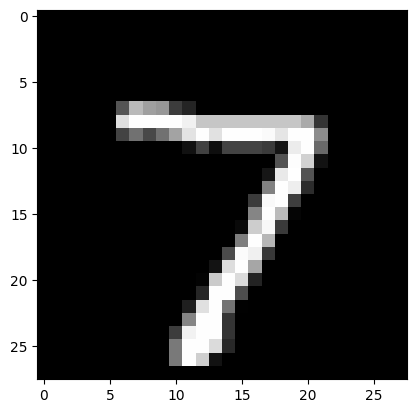

In [99]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[0]

data = data.unsqueeze(0).to(device)

prediction = model.predict(data).item()

print(f'Prediction: {prediction}')

# Display output
image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap='gray')
plt.show()